In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

# Números aleatorizados

Usando la librería numpy, podemos usar random directamente o poner una “semilla” de aleatorización para que siempre escoja aleatoriamente los mismos números en todas las personas que lo prueben. De esta forma pueden repetir los resultados.

- Lo ideal es poner esta semilla al inicio del código para que nos valga para todo.

In [3]:
np.random.seed(2018)
for i in range(5):
    print(np.random.random())

0.8823493117539459
0.10432773786047767
0.9070093335163405
0.3063988986063515
0.446408872427422


Muchas veces para el análisis de datos se necesita que los números aleatorios sigan una distribución concreta, destacando:
- Distribución uniforme
- Distribución Normal

### Distribución uniforme

Suele definirse en base a sus extremos (punto de inicio y de final). Donde la probabilidad de elegir un número entre esos dos extremos es la misma, NO HAY ningún punto con mayor probabilidad. Todos son x_probables. Por lo que:

- Media (mu): Es el punto medio entre ambos límites (a + b)/2
- Varianza: $(b - a)^{2}$/12
- Desviación estandar: √varianza

![Title](Seccion_5_numeros_aleatorizados/Uniforme.png)


En Python exista ya generadores de números aleatorios que siguen dicha distribución.
Usamos la libreria Numpy y su función random.uniform que recibe como parámetros:
- Limites inferior "a" 
- Limite superior "b"
- Número de muestras "n". A mayor muestra, obviamente los valores van a ser cada vez más parecidos en probabilidad.

In [4]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n) 

(array([100068.,  99951., 100755., 100318., 100143.,  99761.,  99876.,
         99624.,  99765.,  99739.]),
 array([ 1.00016486, 10.90014808, 20.80013131, 30.70011454, 40.60009777,
        50.50008099, 60.40006422, 70.30004745, 80.20003068, 90.10001391,
        99.99999713]),
 <a list of 10 Patch objects>)

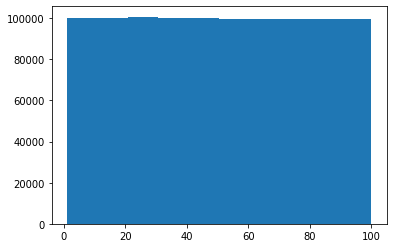

In [5]:
# Para comprobar que todos los puntos generados tienen la misma probabilidad, se dibuja un gráfico
%matplotlib inline
plt.pyplot.hist(data)

### Distribución Normal Estandar

Es la distribución más frecuente. La mayoria de los fenómenos que se analizan tienden a seguir dicha distribución. La ley de los grandes números, y es que, a la larga cuando hacemos más números el fenómeno tienden a comportarse como una campana de Gauss. Centradas en torno a un valor y con una dispersión que a medida que nos alejamos de la media tendremos a no tener datos que analizar.

Esta distribución "Normal estandar" esta definida por;

    - Media (mu): Valor central, respecto al cual se rodean el resto de valores. El cual es 0.
    - Desviación típica (sigma): Desviación de cada valor respecto a la media. Tiene valor de 1.

Prácticamente el 75% de los datos caen entre los +1,-1 desviación típica.

![Title](Seccion_5_numeros_aleatorizados/Normal.png)


La función que genera número aleatorios que sigan una distribución normal ESTANDAR es:

* Libreria de Numpy (función randn(n)):

- n; es el número de aleatorios que quiero.

Si función randn (a,b): Devuelve un array de numeros. Para obterner diferentes versiones de la normal.
- a: Número de serie (colecciones)
- b: número de elemontos de cada una de las colecciones.
Cada una de ella conforma una campana de Gauss

In [6]:
#Ejemplo de crear varias colecciones con randn
data = np.random.randn(2,4)
data

array([[ 0.71747442,  0.32139574,  0.36501324,  1.07542905],
       [-1.42933969,  1.02320892,  1.31605902,  0.6156676 ]])

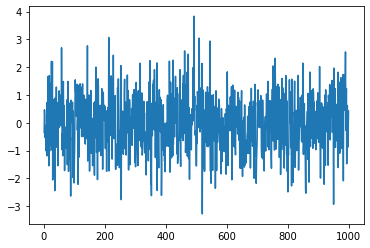

In [7]:
data = np.random.randn(1000)

#Genero un eje x de 1 a 1000, para pintar mis números aleatorios en el eje y

x = range(1,1001)
plt.pyplot.plot(x, data)

(array([  6.,  27.,  96., 209., 278., 233., 113.,  28.,   9.,   1.]),
 array([-3.27586822, -2.56496031, -1.85405239, -1.14314448, -0.43223656,
         0.27867135,  0.98957926,  1.70048718,  2.41139509,  3.12230301,
         3.83321092]),
 <a list of 10 Patch objects>)

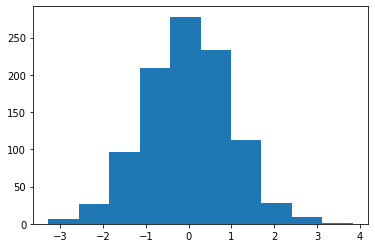

In [8]:
%matplotlib inline
plt.pyplot.hist(data)

#### Función de distribución acumulada

Ordenamos los valores de la distribución normal y nos sale esta función. Y de ahí lo que hacemos es crear este gráfico simplemento usando la libreria Matplotlib y ordenando dichos valores con sorted.

Donde se ve que el inicio crece poco y luego tiende a crecer de forma más paulatina y al final vuelve a crecer muy poco. Es decir si nos fijamos en el eje X apenas hay valores en los dos extremos de la función a diferencia de la zona intermedia.

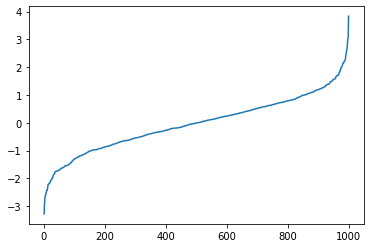

In [9]:
plt.pyplot.plot(x,sorted(data))

### Distribución Normal

Ya no es media 0, y desviación 1 sino que le damos distinta 
        - Media (mu)
        - Desviación estandar (sd)

In [10]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000) #Distribución normal de 10000 valores

Teorema central del límite (Tipificar)

Lo que hacemos es tipificar con Z= (X - mu)/sd: La cual seguira la distribución de una normal estandar N(0,1)
 - Z: Valor tipificado
 - X: Valor a tipificar
 - mu: Media poblacional 
 - sd: Desviación estandar poblacional
 
 Al despejar X, se queda:
 X = mu + sd * Z

(array([   3.,   36.,  279., 1181., 2617., 2970., 1976.,  793.,  127.,
          18.]),
 array([-5.0339103 , -3.03871416, -1.04351802,  0.95167812,  2.94687425,
         4.94207039,  6.93726653,  8.93246267, 10.92765881, 12.92285495,
        14.91805109]),
 <a list of 10 Patch objects>)

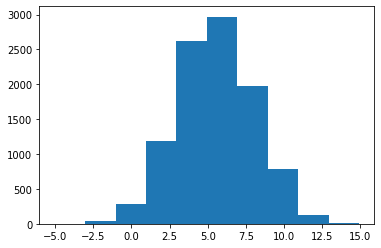

In [11]:
#Tipifico los valores Z para normalizar los datos

data = mu + sd * Z_10000
plt.pyplot.hist(data)

# Simulación de Monte Carlo

Se llama así porque la base para que funcione bien es un buen generador de números al azar, como los casinos de monte carlo. Lo que queremos es calcular el número π. Considereamos un círculo de radio **r** que tendrá un radio fijo y conocido. Este círculo a su vez esta dentro de un cuadrado. El cuadrado tendra por tanto de lado 2**r** ya que es el doble del radio del círculo. La pregunta es:

**¿Cuál es la probabilidad que si elijo un punto cualquiera al azar dentro del cuadrado caiga dentro del circulo?**

Entonces una vez caidos dentro del círculo, podemos despejar π para calcularlo.

- Área círculo: π * r2
- Área cuadrado: base *por* altura: 4*r2

Quedando: π/4 al despejar los radios de las fórmulas

![Title](Seccion_5_numeros_aleatorizados/monte_carlo.png)

## Pasos a realizar:
* **A) Generamos dos números aleatorios uniforme (Porque todos deben ser igual de probables si cogieramos distribución normal serían más probables los del centro) x e y entre 0 y 1 en total 1000 veces**. En verdad habría que generar números desde -1 a 1 pero solo calculamos el cuadrante superior del circulo, no todo. 
* **B) Calcularemos $z = x^2 + y^2$ (Es la fórmula del circulo)**:
    * Si $z \lt; 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* **C) Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos** para obtener una aproximación de la probabilidad de caer dentro del círculo. Es decir 
        - Casos favorables: Caer dentro del círculo  **(float_value)** 
        - Casos posibles: Todas las veces que intente el experimento. Equivale con el diámetro del cuadrado porque este ocupa tanto la superficie del círculo (casos favorables) como el resto de la superficie.  **(n)**
* **D) Usamos dicha probabilidad para aproximar el valor de π. De la siguiente forma: casos favorables/Todos los casos= π/4** Ya que despejamos π de la ecuación. **(float_value * 4 / n)** Por 4, porque es lo que sale al despejar z de los valores que están dentro del circulo. (z=π/4)
* **E) Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π.**
* **F) Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π**

In [12]:
#Función para el calculo aproximado de π: Recibe 2 parámetros:

# n: Números de puntos generados por cada experimento, que estarán dentro o fuera del círculo.
# n_exp: Número de veces que repito el experiemto.


def pi_montecarlo(n, n_exp):
    pi_promedio = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0 #Para ir sumando los casos favorables
        x = np.random.uniform(0,1,n).tolist() #A
        y = np.random.uniform(0,1,n).tolist() #A
        for j in range(n):
            #Al ser x e y listas debo acceder a la posición j de cada lista. Es decir simplemente estamos calculando 
            #el diámetro del cuadrado. Le hacemos la raiz cuadrada para calcular la distancia al origen, aunque no 
            #es necesario ya que si un número es más pequeño que 1 su raiz cuadrada será más pequeño y si es más grande
            #será más grande. 
            z = np.sqrt(x[j] * x[j] + y[j] * y[j]) #B
            if z<=1: #Significa al ser menor que 1, que el punto ha caido dentro del círculo. Y puede ser un nuevo 
                #candidato para π.
                value += 1
        float_value = float(value) #Para poder dividirlo correctamente
        pi_value = float_value * 4 / n #C, #D 
        pi_value_list.append(pi_value) #E
        pi_promedio += pi_value

    pi = pi_promedio/n_exp #F

    print(pi)
    fig = plt.pyplot.plot(pi_value_list)
    return (pi, fig)


3.1412819999999995


(3.1412819999999995, [<matplotlib.lines.Line2D at 0x11a652090>])

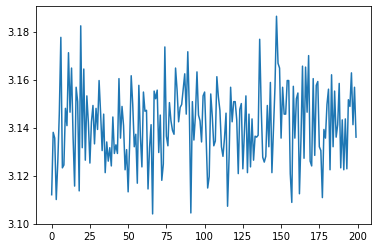

In [13]:
pi_montecarlo(10000, 200)

# Dummy Data Set

Se trata de una lista o array de números aleatorios generados a través de varios métodos. Donde cada uno de dichos métodos obtiene un vector columna que pasara a ser la columna del dataframe. Los nombres de la columnas y sus descripciones se pasan como columnas de la generación del dataset en forma de diccionario, siendo las claves y los valores son cada una de las colecciones generadas aleatoriamentes. 


Para ello usamos la libreria **pandas**

In [14]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n), #Variable A que se distribuye como una normal estandar mu:0 + sd:1.
        'B' : 1.5 + 2.5 * np.random.randn(n), #Variable B que se distribuye como una normal con mu:1,5 + sd:2.5
        'C' : np.random.uniform(5, 32, n) #Variable C que sigue la distribución uniforme con limite inf:5 + limi sup:32 con los mismos valores que las otras.
    }
)

In [15]:
data.describe()
#Para comprobar que se han creado seguido nuestras caraterísticas.

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.000125,1.499570,18.497688
std,1.000279,2.499711,7.795630
min,-4.478821,-11.112279,5.000035
25%,-0.675708,-0.186294,11.741707
50%,-0.000143,1.502810,18.504145
75%,0.675316,3.188058,25.248765
max,4.854742,13.987265,31.999963


In [17]:
data = pd.read_csv("Seccion_5_numeros_aleatorizados/Customer Churn Model.csv")

colum_names = data.columns.values.tolist()
a=len(colum_names)

In [18]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a) #Cambiar el índice para que empiece por 42 y le sumamos todas las filas. 
)

In [19]:
new_data.head()

,Column Name,A,B
42,state,-0.478577,0.187433
43,account length,-0.353480,0.880588
44,area code,0.206630,0.490330
45,phone number,0.006900,0.886492
46,international plan,-1.899214,0.940523
